In [18]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np
import pandas as pd

In [58]:
problem = {
    'num_vars': 3,
    'names': ['random-mating', 'leakage', 'fertility'],
    'bounds': [[0, 1],
               [0, 0.60],
               [0, 0.30]]
}

In [101]:
param_values = saltelli.sample(problem, 512, calc_second_order=True)
# param_values.size
t = pd.DataFrame(param_values)
t.columns = ["random_mating", "leakage", "fertility"]
t.to_csv("../models/fertility-BMI/data/param_values.csv", index=False)
len(t)

4096

In [65]:
output = pd.read_csv("../output/data/results-sobol.csv")

In [75]:
Y = output["g4"].to_numpy()

In [76]:
Si = sobol.analyze(problem, Y, print_to_console=True)

                     ST   ST_conf
random-mating  0.299343  0.296624
leakage        0.873555  0.425291
fertility      0.366689  0.231605
                     S1   S1_conf
random-mating  0.068263  0.201207
leakage        0.406491  0.793088
fertility      0.227035  0.259328
                                  S2   S2_conf
(random-mating, leakage)   -0.026663  0.344367
(random-mating, fertility) -0.163981  0.425451
(leakage, fertility)       -0.041532  0.949267


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

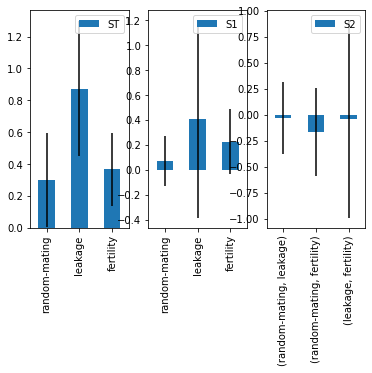

In [77]:
Si.plot()